In [1]:
%run ./PPS_Expansion_Model.ipynb

In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
ts = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - ts * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

In [3]:
##Pre-Training
###SCZ
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(a_distances, scz_cp, scz_slope)

##Post-Training
###SCZ
ymin = 385
ymax = 426
scz_cp_post = 100 - 1.361 * v
scz_slope_post = 1 / 0.061  # negative

SCZ_RTs_post = RTsig(a_distances, scz_cp_post, scz_slope_post)

## SCZ Pre-training model

In [8]:
## Fitted model

Lex, Pr = 2.845e00, 3.938e-01

SCZLt, SCZLa, SCZLv = Lw(
    Lex_t=Lex,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=Lex,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=Lex,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)
HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=1.289e01,
    k2=7.552e02,
    lim=3.674e01,
    alpha=9.797e-01,
)

_, _, _, _, SCZ_Model_RTs = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    CMpr=0,
)

SCZ_RTs_model_pre_scaled = fit_RT(xf=SCZ_Model_RTs, yf=SCZ_RTs)

## SCZ Post-training model

In [9]:
## Fitted model

Lex, Pr = 2.845e00, 3.938e-01
k_a = 5e-05
k_v = 5e-05
stim_counts = 10
locav_x = 70
siga_x, sigv_x = 6.846e01, 9.532e-01

rho_0 = 9.526e-02

SCZLt, SCZLa, SCZLv = Lw(
    Lex_t=Lex,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=Lex,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=Lex,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)
HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=1.289e01,
    k2=7.552e02,
    lim=3.674e01,
    alpha=9.797e-01,
)

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=0.05,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)


_, _, _, _, SCZ_Model_RTs_post = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=SCZWa_tr[:, :, -1, -1],
    Wv=SCZWv_tr[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

SCZ_RTs_model_post_scaled = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)

## SCZ Post-training model - rho

In [19]:
Lex, Pr = 2.845e00, 3.938e-01
k_a = 5e-05
k_v = 5e-05
stim_counts = 10
locav_x = 70
siga_x, sigv_x = 6.846e01, 9.532e-01

rho_0 = 1.671e-02

SCZLt, SCZLa, SCZLv = Lw(
    Lex_t=Lex,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=Lex,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=Lex,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)
HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=1.289e01,
    k2=7.552e02,
    lim=3.674e01,
    alpha=9.797e-01,
)

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=0.05,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)


_, _, _, _, SCZ_Model_RTs_post_rho = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=SCZWa_tr[:, :, -1, -1],
    Wv=SCZWv_tr[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

SCZ_RTs_model_post_rho_scaled = fit_RT(SCZ_Model_RTs_post_rho, SCZ_RTs_post)

In [20]:
model_a_distances = np.linspace(a_distances[0], a_distances[-1], 100)

# Sigmoid for pre-training model
ymin, ymax = np.min(SCZ_RTs_model_pre_scaled), np.max(SCZ_RTs_model_pre_scaled)
SCZ_CP_Model_pre, SCZ_SLOPE_Model_pre = fitting(a_distances, SCZ_RTs_model_pre_scaled)
SCZ_Model_RTs_pre_fit = RTsig(model_a_distances, SCZ_CP_Model_pre, SCZ_SLOPE_Model_pre)

# Sigmoid for post-training model
ymin, ymax = np.min(SCZ_RTs_model_post_scaled), np.max(SCZ_RTs_model_post_scaled)
SCZ_CP_Model_post, SCZ_SLOPE_Model_post = fitting(
    a_distances, SCZ_RTs_model_post_scaled
)
SCZ_Model_RTs_post_fit = RTsig(
    model_a_distances, SCZ_CP_Model_post, SCZ_SLOPE_Model_post
)

# Sigmoid for post-training rho model
ymin, ymax = np.min(SCZ_RTs_model_post_rho_scaled), np.max(
    SCZ_RTs_model_post_rho_scaled
)
SCZ_CP_Model_post_rho, SCZ_SLOPE_Model_post_rho = fitting(
    a_distances, SCZ_RTs_model_post_rho_scaled
)
SCZ_Model_RTs_post_rho_fit = RTsig(
    model_a_distances, SCZ_CP_Model_post_rho, SCZ_SLOPE_Model_post_rho
)

In [9]:
import seaborn as sns

sns.set_context("paper")
sns.set_theme(
    style="ticks",
    palette=["black", "grey", "grey"],
    rc={"axes.labelsize": 14, "axes.labelweight": "bold"},
)

/tmp/ipykernel_23124/38036791.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


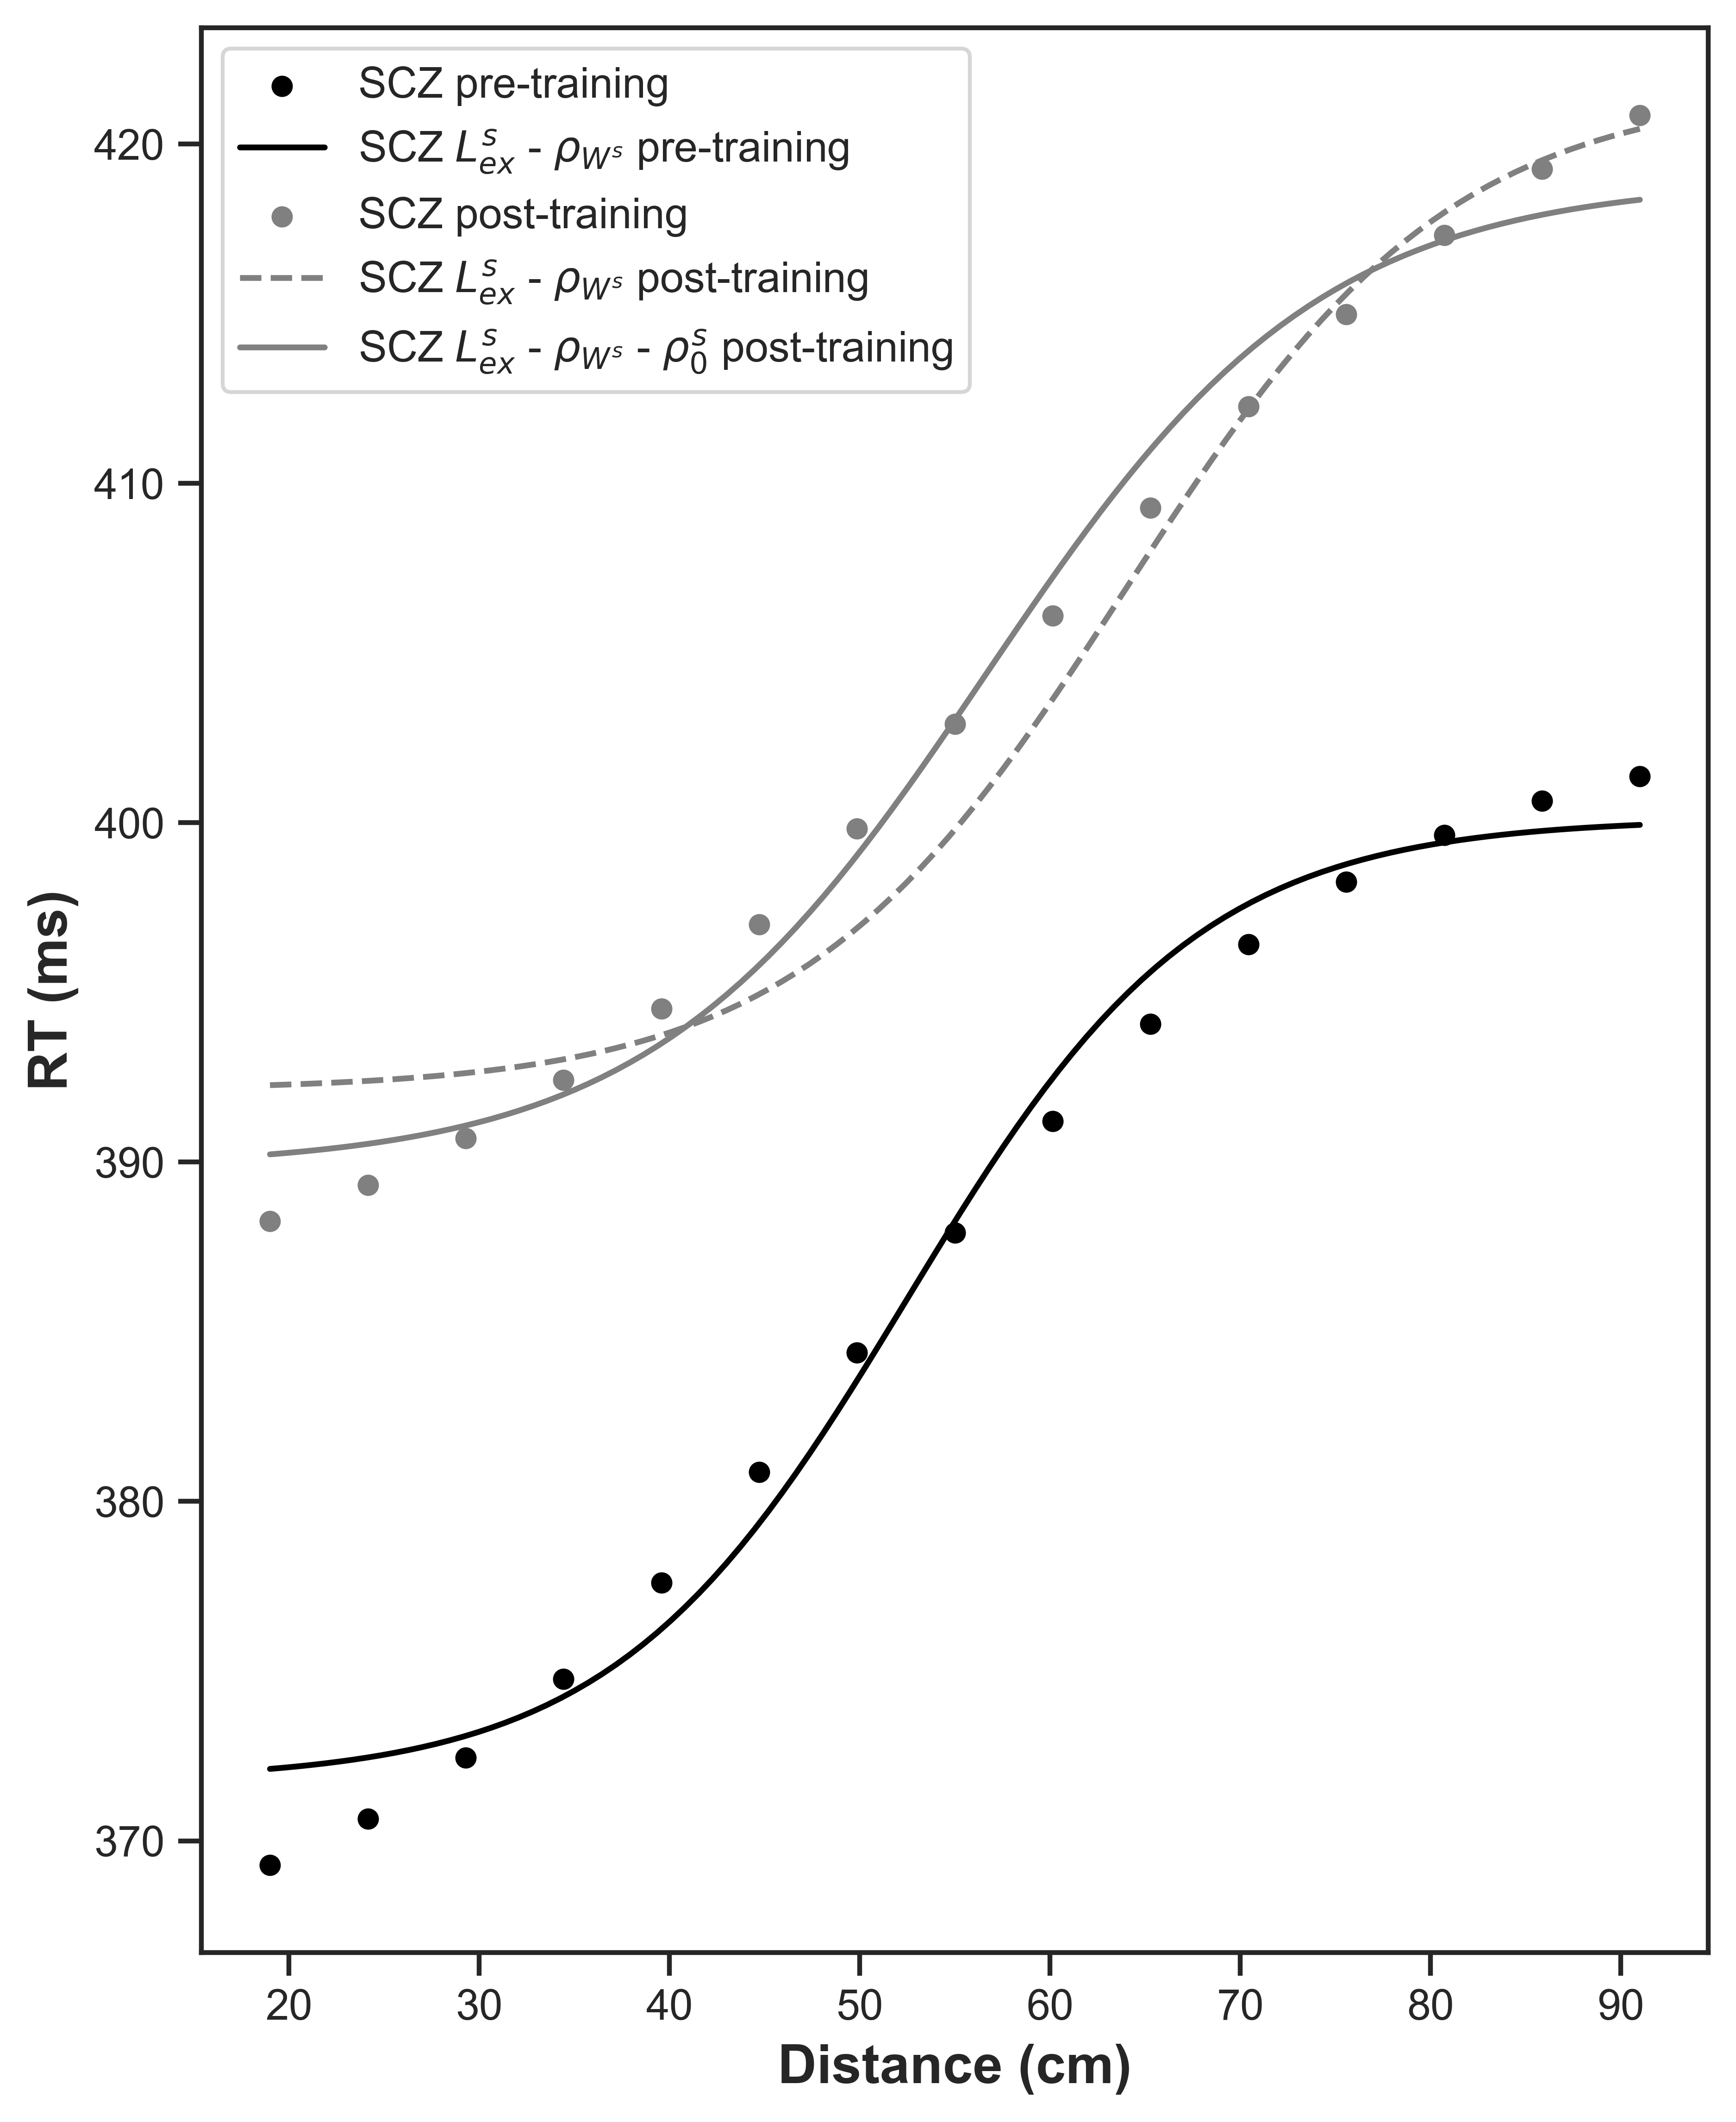

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(7, 9), dpi=600)
ax1 = plt.subplot(111)

sns.scatterplot(x=a_distances, y=SCZ_RTs, label="SCZ pre-training", ax=ax1)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_pre_fit,
    label="SCZ $L_{ex}^{s}$ - " + r"$\rho_{{W}^{s}}$ pre-training",
    ax=ax1,
)
sns.scatterplot(
    x=a_distances, y=SCZ_RTs_post, label="SCZ post-training", ax=ax1, palette="gray"
)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_post_fit,
    label="SCZ $L_{ex}^{s}$ - " + r"$\rho_{{W}^{s}}$ post-training",
    ax=ax1,
    linestyle="--",
)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_post_rho_fit,
    label="SCZ $L_{ex}^{s}$ - "
    + r"$\rho_{{W}^{s}}$ - "
    + r"$\rho^{s}_{0}$ post-training",
    ax=ax1,
)

ax1.set_xlabel("Distance (cm)")
ax1.set_ylabel("RT (ms)")

fig.savefig("drafts/FIG3.eps", bbox_inches="tight", format="eps")

In [4]:
##Pre-Training
###HC
ymin = 280
ymax = 331
hc_cp = 100 - 1.377 * 30
hc_slope = 1 / 0.11

HC_RTs = RTsig(a_distances, hc_cp, hc_slope)

##Post-Training
###HC
ymin = 277
ymax = 335
hc_cp_post = 100 - 1.028 * 30
hc_slope_post = 1 / 0.18  # negative

HC_RTs_post = RTsig(a_distances, hc_cp_post, hc_slope_post)

In [15]:
## Fitted model

k_a = 5e-05
k_v = 5e-05
stim_counts = 10
locav_x = 60

rho_0, siga_x, sigv_x = 1.129e-01, 6.883e01, 2.283e00

HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)

HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=1.289e01,
    k2=7.552e02,
    lim=3.674e01,
    alpha=9.797e-01,
)

HCWa_tr, HCWv_tr, zm, zv, za, zt = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=0.05,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

_, _, _, _, HC_Model_RTs_post = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa_tr[:, :, -1, -1],
    Wv=HCWv_tr[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

HC_Model_RTs_post_scaled = fit_RT(HC_Model_RTs_post, HC_RTs_post)

_, _, _, _, HC_Model_RTs_pre = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

HC_RTs_model_pre_scaled = fit_RT(HC_Model_RTs_pre, HC_RTs)

In [16]:
model_a_distances = np.linspace(a_distances[0], a_distances[-1], 100)

ymin, ymax = np.min(HC_RTs_model_pre_scaled), np.max(HC_RTs_model_pre_scaled)
HC_CP_Model_pre, HC_SLOPE_Model_pre = fitting(a_distances, HC_RTs_model_pre_scaled)
HC_Model_RTs_pre_fit = RTsig(model_a_distances, HC_CP_Model_pre, HC_SLOPE_Model_pre)

ymin, ymax = np.min(HC_Model_RTs_post_scaled), np.max(HC_Model_RTs_post_scaled)
HC_CP_Model_post, HC_SLOPE_Model_post = fitting(a_distances, HC_Model_RTs_post_scaled)
HC_Model_RTs_post_fit = RTsig(model_a_distances, HC_CP_Model_post, HC_SLOPE_Model_post)

In [19]:
def sigmoid_model(x, L, U, x0, k):
    """
    L: Lower asymptote (ymin)
    U: Upper asymptote (ymax)
    x0: Midpoint (cp)
    k: Slope factor (steepness)
    """
    return L + (U - L) / (1 + np.exp(-k * (x - x0)))


def fitting_robust(distances, RTs):
    # Smart Initial Guesses (p0)
    # L (Lower): Min of data
    p_min = np.min(RTs)
    # U (Upper): Max of data + a margin (since data is still rising)
    p_max = np.max(RTs) * 1.05
    # x0 (Midpoint): Average of x-range
    p_cp = np.mean(distances)
    # k (Slope): Estimate based on rise/run roughly
    p_slope = 0.1  # Start with a gentle slope

    init_guess = [p_min, p_max, p_cp, p_slope]

    # Optional: Bounds to prevent impossible values (e.g., negative times)
    # L, U, x0, k
    bounds = (
        [0, np.max(RTs), np.min(distances), 0],  # Lower bounds
        [np.max(RTs), np.inf, np.max(distances), np.inf],  # Upper bounds
    )

    try:
        popt, pcov = curve_fit(
            sigmoid_model,
            distances,
            RTs,
            p0=init_guess,
            method="trf",
            maxfev=10000,
            bounds=bounds,
        )

        L_fit, U_fit, cp_fit, slope_fit = popt

        # Return the specific parameters you need
        return cp_fit, slope_fit, U_fit, L_fit

    except RuntimeError:
        print("Fit failed to converge")
        return None


# 3. Run the fit
pre_cp, pre_slope, top, bottom = fitting_robust(a_distances, HC_RTs_model_pre_scaled)
post_cp, post_slope, top, bottom = fitting_robust(a_distances, HC_Model_RTs_post_scaled)

In [20]:
print(post_cp - pre_cp)
print(post_slope - pre_slope)

10.598902393238284
0.029410651142149052


In [21]:
print("Delta CP:", HC_CP_Model_post - HC_CP_Model_pre)
print("Delta Slope:", 1 / HC_SLOPE_Model_post - 1 / HC_SLOPE_Model_pre)

Delta CP: 8.994917441114843
Delta Slope: 0.0344984400971798


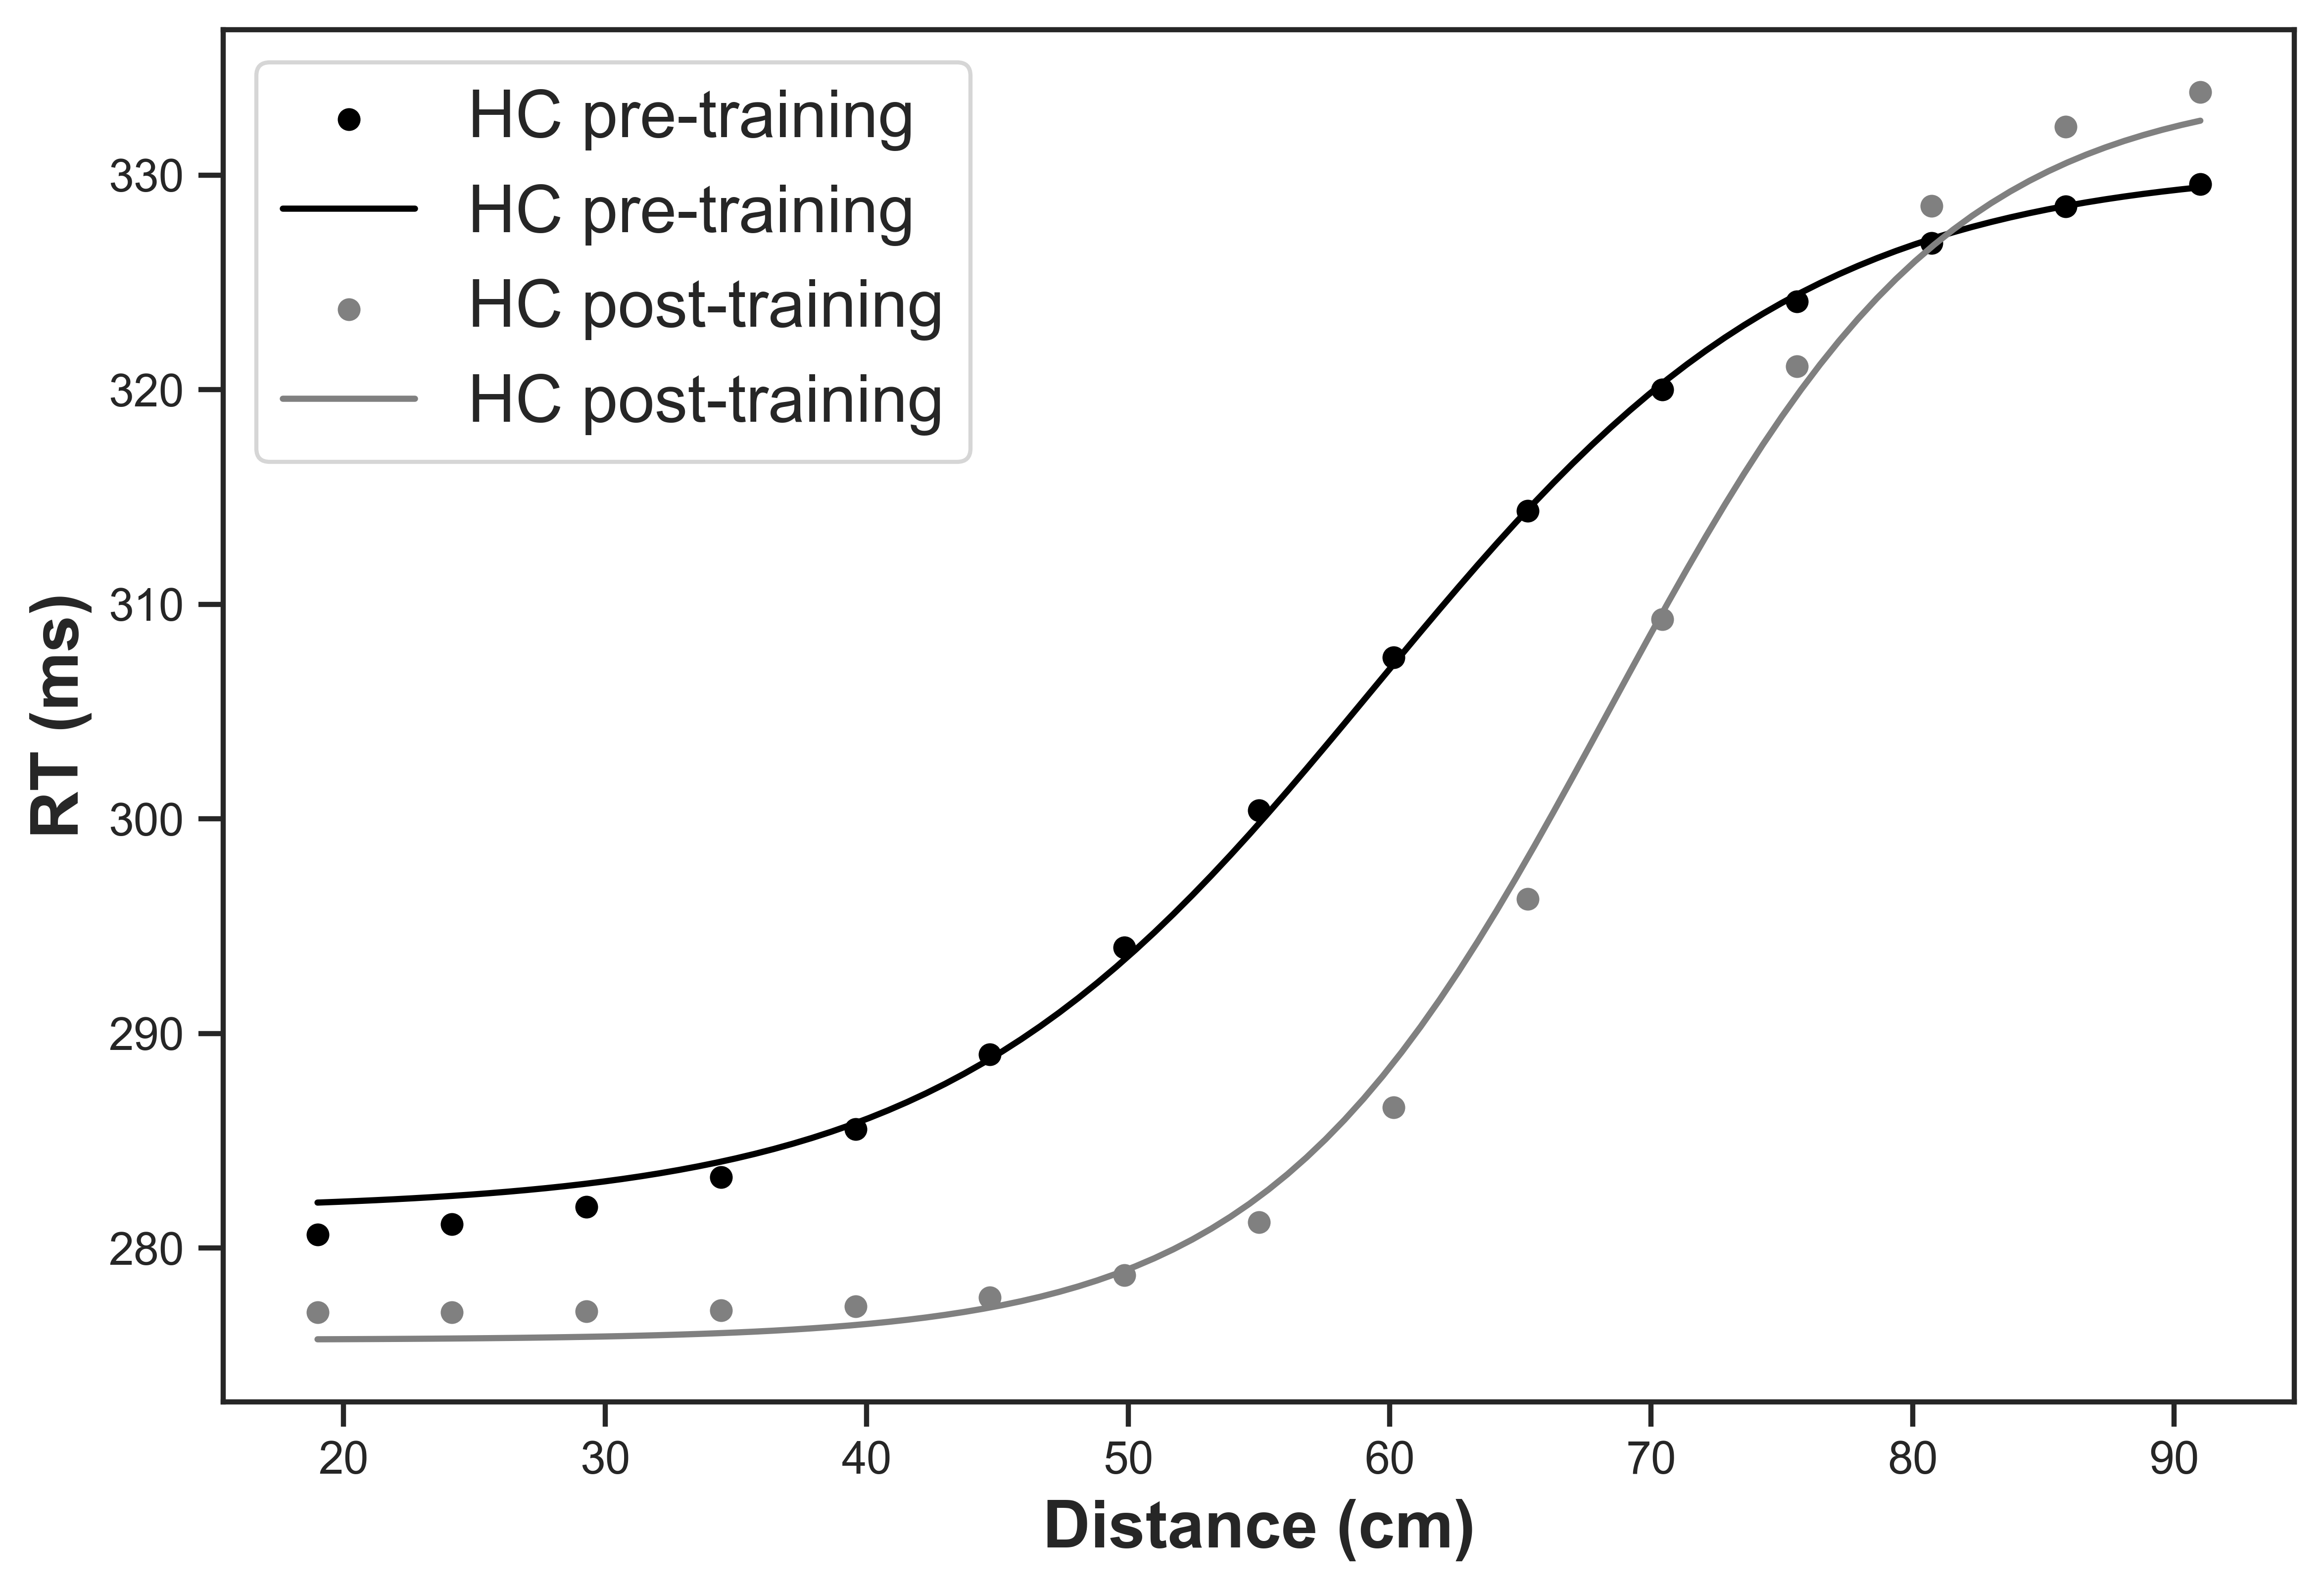

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(9, 6), dpi=600)
ax1 = plt.subplot(111)

sns.scatterplot(x=a_distances, y=HC_RTs, label="HC pre-training", ax=ax1)
sns.lineplot(
    x=model_a_distances,
    y=HC_Model_RTs_pre_fit,
    label="HC pre-training",
    ax=ax1,
)
sns.scatterplot(x=a_distances, y=HC_RTs_post, label="HC post-training", ax=ax1)

sns.lineplot(
    x=model_a_distances,
    y=HC_Model_RTs_post_fit,
    label="HC post-training",
    ax=ax1,
)

ax1.set_xlabel("Distance (cm)", size=16)
ax1.set_ylabel("RT (ms)", size=16)

ax1.legend(fontsize=16)

# fig.savefig("drafts/FIG0.eps", bbox_inches="tight", format="eps")